C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


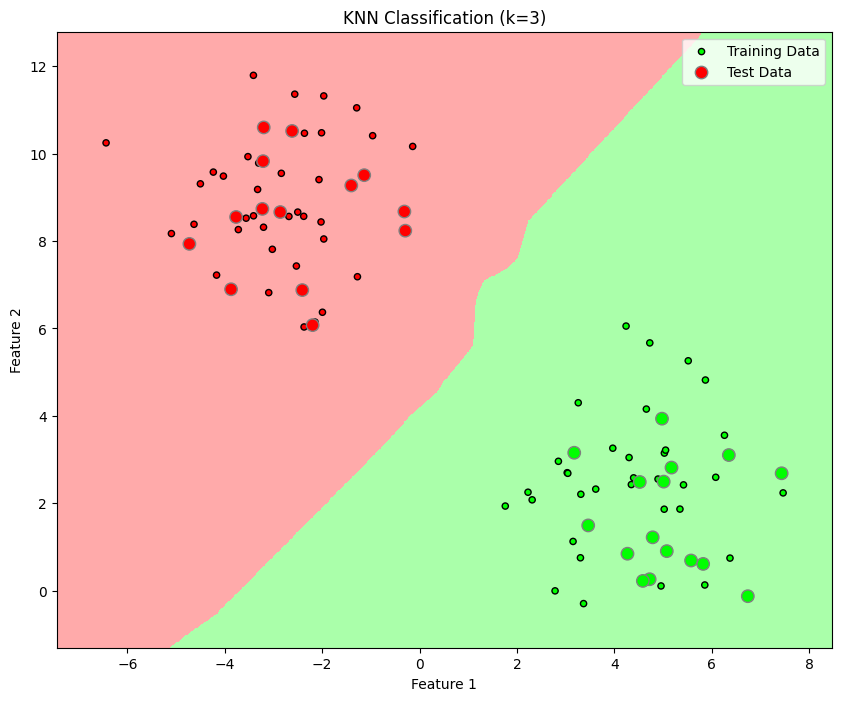

Predictions on the test set: [0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1]
Actual labels of the test set: [0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

# Generate some synthetic data for classification
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Choose the value of k
k = 3

# Create a KNN classifier with k neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier using the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# --- Visualization ---
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

h = .02  # step size in the mesh

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20, label='Training Data')
# Plot the test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='gray', s=80, marker='o', label='Test Data')

plt.title(f"KNN Classification (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

print("Predictions on the test set:", y_pred)
print("Actual labels of the test set:", y_test)

## K-Nearest Neighbors (KNN) Algorithm

The K-Nearest Neighbors (KNN) algorithm is a versatile method for classification and regression. Here's a step-by-step guide:

**1. Data Preparation**

* **Dataset:** We have $n$ data points. Each point has features $\mathbf{x}_i$ and a label $y_i$.

    * Classification: $y_i$ is a class (e.g., C1, C2).
    * Regression: $y_i$ is a value.
* **Split:** Divide data into training and testing sets.

**2. Choose K**

* Select a positive integer $k$ (neighbors to consider).

**3. Distance Calculation**

* For a new point $\mathbf{x}_{query}$, calculate its distance to all training points $\mathbf{x}_i$.
* Common metrics:

    * **Euclidean Distance:**

        $d(\mathbf{x}_{query}, \mathbf{x}_i) = \sqrt{\sum_{j=1}^{d} (x_{query,j} - x_{i,j})^2}$

        Where $d$ is the number of features.

    * **Manhattan Distance:**

        $d(\mathbf{x}_{query}, \mathbf{x}_i) = \sum_{j=1}^{d} |x_{query,j} - x_{i,j}|$

**4. Find Nearest Neighbors**

* Get the $k$ closest training points to $\mathbf{x}_{query}$. Let their indices be $N_k(\mathbf{x}_{query})$.

**5. Make a Prediction**

* **Classification:**

    * Assign $\mathbf{x}_{query}$ the most common class among its $k$ neighbors.
    * Predicted class $\hat{y}$:

        $\hat{y} = \text{argmax}_{c} \sum_{i \in N_k(\mathbf{x}_{query})} I(y_i = c)$

        $I(y_i = c)$ is 1 if neighbor $i$'s label is $c$, 0 otherwise.

* **Regression:**

    * Predict $\mathbf{x}_{query}$'s value by averaging its neighbors' values.
    * Predicted value $\hat{y}$:

        $\hat{y} = \frac{1}{k} \sum_{i \in N_k(\mathbf{x}_{query})} y_i$


## K-Nearest Neighbors (KNN) Algorithm

The KNN algorithm is a simple method used to guess the category or value of a new data point based on its closest neighbors.

**1. Data Preparation**

* **Dataset:** Imagine you have a collection of items (data points). Each item has:

    * **Features** (think of these as descriptions or characteristics): We call these "x".  For example, if the items are fruits, the features could be color, size, and weight.  We use $\mathbf{x}_i$ to represent the features of the i-th item.
    * **Labels** (what we want to predict): We call these "y".
        * For **classification** (predicting categories): The label "y" is the category the item belongs to (e.g., "apple", "banana").  So, $y_i$ is the category of the i-th item.
        * For **regression** (predicting values): The label "y" is a value (e.g., the price of the fruit).  So, $y_i$ is the value of the i-th item.
* **Split:** Divide your collection of items into two groups:
    * **Training set:** The items we use to "teach" the algorithm.
    * **Testing set:** The items we use to see how well the algorithm has learned.

**2. Choose K**

* Decide how many neighbors to consider. This number is called "K".  For example, if you choose K = 3, the algorithm will look at the 3 closest items.

**3. Distance Calculation**

* When you have a *new* item and you want to know its category or value, you calculate how "far away" it is from all the items in your training set.  We call this new item "$\mathbf{x}_{query}$".
* We use a distance formula. Two common ones are:
    * **Euclidean Distance** (straight-line distance):

        Distance = $\sqrt{\sum_{j=1}^{d} (x_{query,j} - x_{i,j})^2}$

        * Imagine you're measuring the distance between two points on a map.
        * 'd' is the number of features (e.g., 3 for color, size, and weight).
        * $x_{query,j}$ is the j-th feature of the new item.
        * $x_{i,j}$ is the j-th feature of a training item.
    * **Manhattan Distance** (distance along a grid):

        Distance = $\sum_{j=1}^{d} |x_{query,j} - x_{i,j}|$

        * Imagine you're measuring the distance between two points in a city where you can only walk along blocks.

**4. Find Nearest Neighbors**

* Find the "K" items from the training set that are closest to the new item ($\mathbf{x}_{query}$).

**5. Make a Prediction**

* **Classification:**
    * Look at the categories of the "K" closest items. The new item is assigned the category that appears most often.
    * To put it in a formula:
        Predicted category of new item = The category 'c' that occurs most in:  $\sum_{i \in \text{K Nearest Neighbors}} I(y_i = c)$
        * $I(y_i = c)$ is just a fancy way of saying: "Count 1 if the neighbor has category 'c', otherwise count 0."
* **Regression:**
    * Calculate the average value of the "K" closest items. This average is the predicted value of the new item.
    * To put it in a formula:
        Predicted value of new item = (1/K) \* $\sum_{i \in \text{K Nearest Neighbors}} y_i$


In [1]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
brs=load_breast_cancer()

In [3]:
df=pd.DataFrame(brs.data,columns=brs.feature_names)

In [4]:
df['Target']=brs.target
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(['Target'],axis=1),df['Target'],test_size=0.2,random_state=2)

In [16]:
X_train.shape

(455, 30)

In [17]:
Y_train.shape

(455,)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()

In [20]:
X_train=sc.fit_transform(X_train)
X_train

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [21]:
X_test=sc.transform(X_test)

In [31]:
X_train=pd.DataFrame(X_train,columns=df.drop(['Target'],axis=1).columns)
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.013303,1.775766,-0.014920,-0.144789,0.228790,0.175467,-0.544402,-0.128256,-1.012054,-0.152706,...,-0.186400,1.187213,-0.196141,-0.291354,-0.332182,-0.171367,-0.659330,-0.132370,-1.080145,-0.035279
1,-0.844828,-0.628428,-0.877027,-0.765610,-1.019821,-1.249059,-0.944554,-0.889091,-1.109505,-0.186165,...,-0.949992,-0.884569,-0.980765,-0.806497,-1.240630,-1.224541,-1.078200,-1.115526,-0.857740,-0.720989
2,1.447559,0.711802,1.474288,1.405424,-0.758582,0.754792,0.319555,0.511737,-0.149990,-1.086665,...,1.513753,1.008666,1.813225,1.478636,0.016558,1.968844,0.565914,0.875840,0.496760,0.463217
3,-0.081648,0.999483,-0.007498,-0.152149,2.546938,1.407012,0.893973,1.135134,1.664093,1.665752,...,0.636255,2.583414,0.662848,0.513646,3.908676,1.717432,0.942800,1.341755,2.568643,1.371035
4,-0.896086,0.451519,-0.818069,-0.793920,1.872772,0.351950,0.228993,0.225711,0.329767,0.864176,...,-0.705305,1.536263,-0.590122,-0.638931,2.543851,0.106982,0.642160,0.442004,0.113821,0.676463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-1.021384,0.848793,-1.026278,-0.898381,0.383989,-0.680668,-0.798879,-0.758136,-0.419854,0.407379,...,-1.108195,-0.252418,-1.109765,-0.911834,-0.754115,-1.070936,-1.098564,-1.255912,-1.118606,-0.890478
451,-0.893238,-0.400109,-0.863834,-0.809490,0.058844,-0.113812,-0.440773,-0.521380,-0.704710,0.192074,...,-0.962648,0.115934,-0.917630,-0.831027,0.472935,-0.013593,-0.274722,-0.226927,-1.014929,-0.059096
452,-0.466085,-1.493755,-0.532349,-0.493276,-1.566878,-1.208967,-1.028867,-0.946400,-0.727198,-0.382559,...,-0.631477,-1.516720,-0.710927,-0.602857,-1.611328,-1.207994,-1.218434,-1.323890,-1.029979,-0.751453
453,-0.500258,-1.621613,-0.527814,-0.518188,-0.421499,-0.774665,-0.738979,-0.557944,-0.442342,-0.680786,...,-0.542883,-1.048639,-0.590122,-0.547122,-0.112605,-0.293225,-0.434935,-0.098763,0.357966,-0.439062


In [32]:
X_test=pd.DataFrame(X_test,columns=df.drop(['Target'],axis=1).columns)

In [33]:
X_test.shape

(114, 30)

In [34]:
Y_test.shape

(114,)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier(n_neighbors=6)

In [37]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [39]:
Y_pred_test=knn.predict(X_test)
Y_pred_train=knn.predict(X_train)

In [40]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [44]:
print("the accuracy of the training is",accuracy_score(Y_train,Y_pred_train))
print("the f1_score of the training is",f1_score(Y_train,Y_pred_train))
print("the Cofusion matrix of the training is : \n",confusion_matrix(Y_train,Y_pred_train))

the accuracy of the training is 0.9758241758241758
the f1_score of the training is 0.9810671256454389
the Cofusion matrix of the training is : 
 [[159   8]
 [  3 285]]


In [45]:
print("the accuracy of the testing is",accuracy_score(Y_test,Y_pred_test))
print("the f1_score of the testing is",f1_score(Y_test,Y_pred_test))
print("the Cofusion matrix of the testing is : \n",confusion_matrix(Y_test,Y_pred_test))

the accuracy of the testing is 0.9736842105263158
the f1_score of the testing is 0.9787234042553191
the Cofusion matrix of the testing is : 
 [[42  3]
 [ 0 69]]


In [48]:
for i in range(1,10): 
    knn=KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train,Y_train) 
    Y_pred_train=knn.predict(X_train)  
    Y_pred_test=knn.predict(X_test)
    
    train_acc = accuracy_score(Y_train, Y_pred_train)
    test_acc = accuracy_score(Y_test, Y_pred_test)
    print(f"k={i} | Train Acc: {train_acc:.3f} | Test Acc: {test_acc:.3f}")

k=1 | Train Acc: 1.000 | Test Acc: 0.956
k=2 | Train Acc: 0.978 | Test Acc: 0.947
k=3 | Train Acc: 0.980 | Test Acc: 0.991
k=4 | Train Acc: 0.980 | Test Acc: 0.982
k=5 | Train Acc: 0.976 | Test Acc: 0.974
k=6 | Train Acc: 0.976 | Test Acc: 0.974
k=7 | Train Acc: 0.974 | Test Acc: 0.974
k=8 | Train Acc: 0.978 | Test Acc: 0.982
k=9 | Train Acc: 0.974 | Test Acc: 0.974


In [52]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k_values = []
train_accs = []
test_accs = []

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)

    train_acc = accuracy_score(Y_train, Y_pred_train)
    test_acc = accuracy_score(Y_test, Y_pred_test)

    k_values.append(k)
    train_accs.append(train_acc)
    test_accs.append(test_acc)


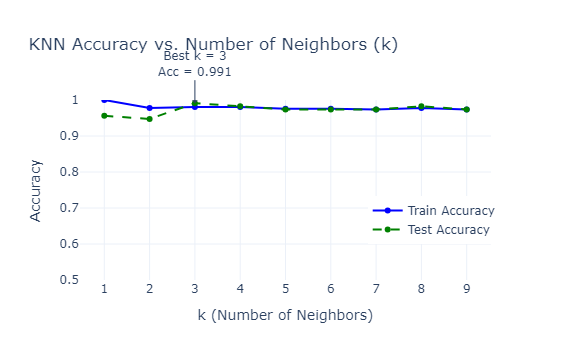

In [51]:
import plotly.graph_objects as go

fig = go.Figure()

# Training Accuracy Trace
fig.add_trace(go.Scatter(
    x=k_values,
    y=train_accs,
    mode='lines+markers',
    name='Train Accuracy',
    marker=dict(color='blue'),
    line=dict(dash='solid')
))

# Testing Accuracy Trace
fig.add_trace(go.Scatter(
    x=k_values,
    y=test_accs,
    mode='lines+markers',
    name='Test Accuracy',
    marker=dict(color='green'),
    line=dict(dash='dash')
))

# Layout & Annotations
fig.update_layout(
    title='KNN Accuracy vs. Number of Neighbors (k)',
    xaxis=dict(title='k (Number of Neighbors)', tickmode='linear', dtick=1),
    yaxis=dict(title='Accuracy', range=[0.5, 1]),
    legend=dict(x=0.7, y=0.2),
    template='plotly_white'
)
best_k = k_values[test_accs.index(max(test_accs))]
best_acc = max(test_accs)

fig.add_annotation(
    x=best_k,
    y=best_acc,
    text=f"Best k = {best_k}<br>Acc = {best_acc:.3f}",
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=-40
)

fig.show()
